In [ ]:
using Revise
using FUSE
FUSE.logging(Logging.Info; actors=Logging.Info);
FUSE.ProgressMeter.ijulia_behavior(:clear);

In [235]:
chk = FUSE.Checkpoint();
ini, act = FUSE.case_parameters(:D3D)
#ini.nb_unit[1].power_launched = t-> 2.5E6 + ramp(t-0.5) * 5E6
act.ActorHCD.nb_model = :RABBIT
dd = IMAS.dd();
FUSE.init(dd, ini, act);
chk[:init] = dd, ini, act;

[ Info: HCD
[ Info:  SimpleEC
[ Info:  SimpleIC
[ Info:  SimpleLH
[ Info:  RABBIT
[ Info:  SimplePellet
[ Info: Current
[ Info:  SteadyStateCurrent
[ Info: CXbuild


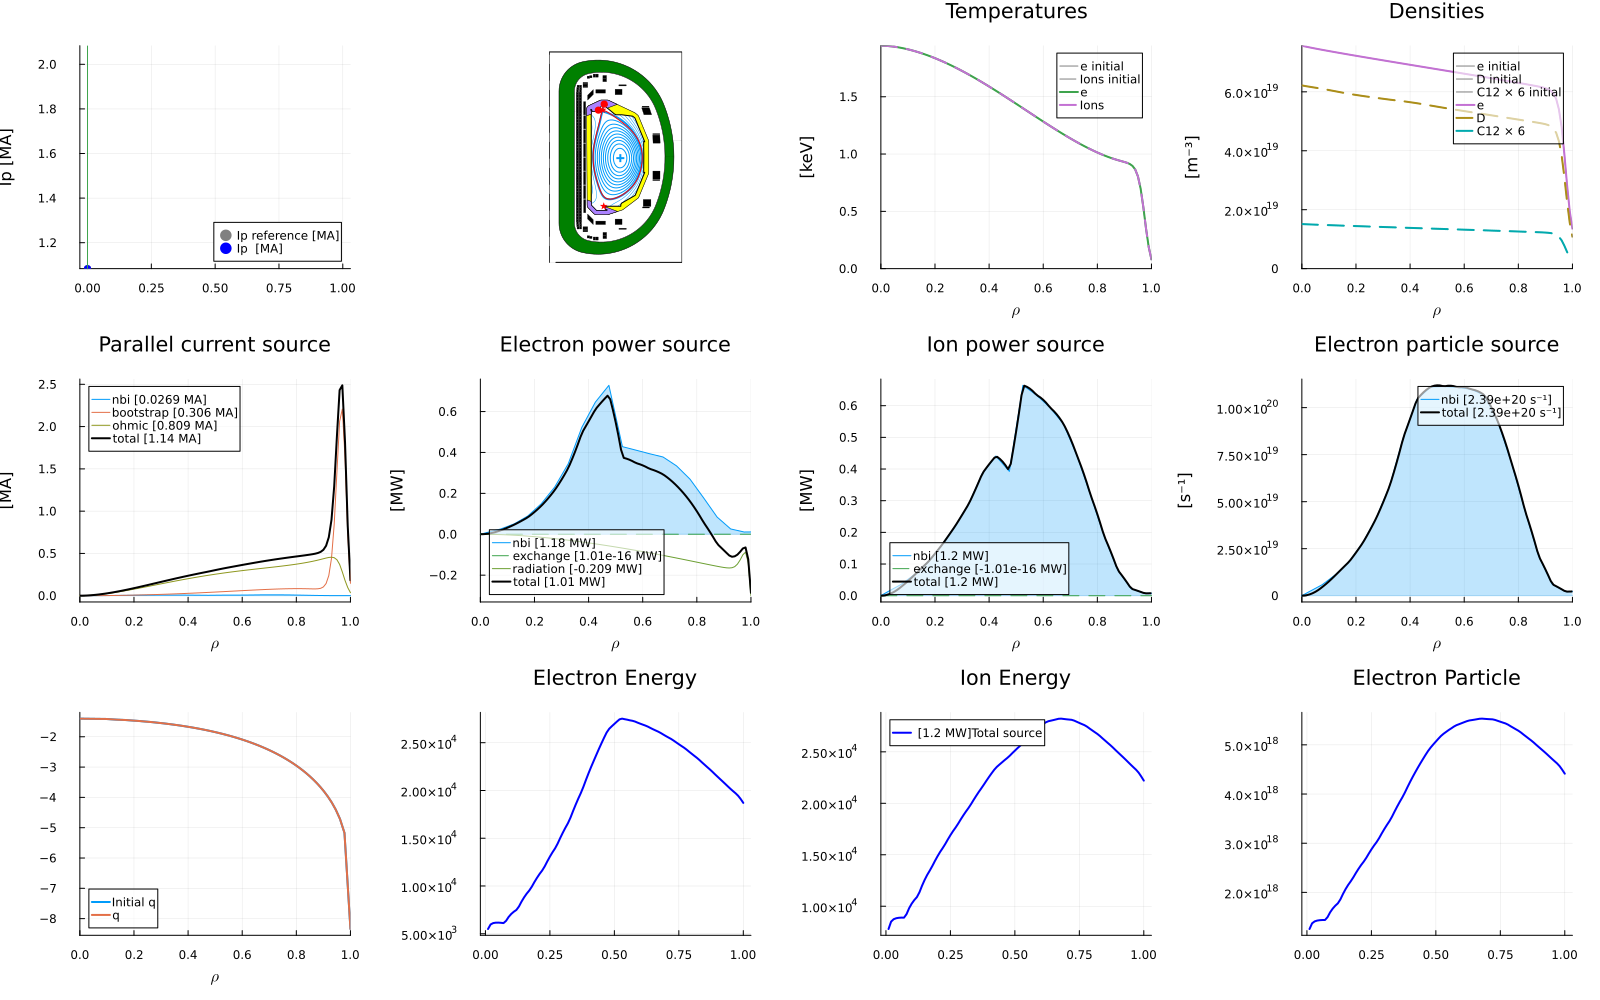

In [237]:
dd, ini, act = chk[:init];
plot(dd.core_sources)
FUSE.plot_plasma_overview(dd, dd.global_time; min_power=0.1E6, aggregate_radiation=true)

In [238]:
dd, ini, act = chk[:init];
act.ActorCoreTransport.model = :FluxMatcher
FUSE.ActorStationaryPlasma(dd, act; verbose=true)
chk[:stationary] = dd, ini, act;

Progress: 100%|███████████████████████████| Time: 0:00:48 ( 1.51  s/it)
           iteration (min 2):  4/5
  required convergence error:  0.05
         convergence history:  [0.036625575804567725, 0.10889107692746229, 0.07571291602171012, 0.16076308379238954]
                       stage:  N/A
                     Ip [MA]:  1.0786277546000336
                   Ti0 [keV]:  2.935561368507912
                   Te0 [keV]:  2.945916116799296
              ne0 [10²⁰ m⁻³]:  0.7927535472453306


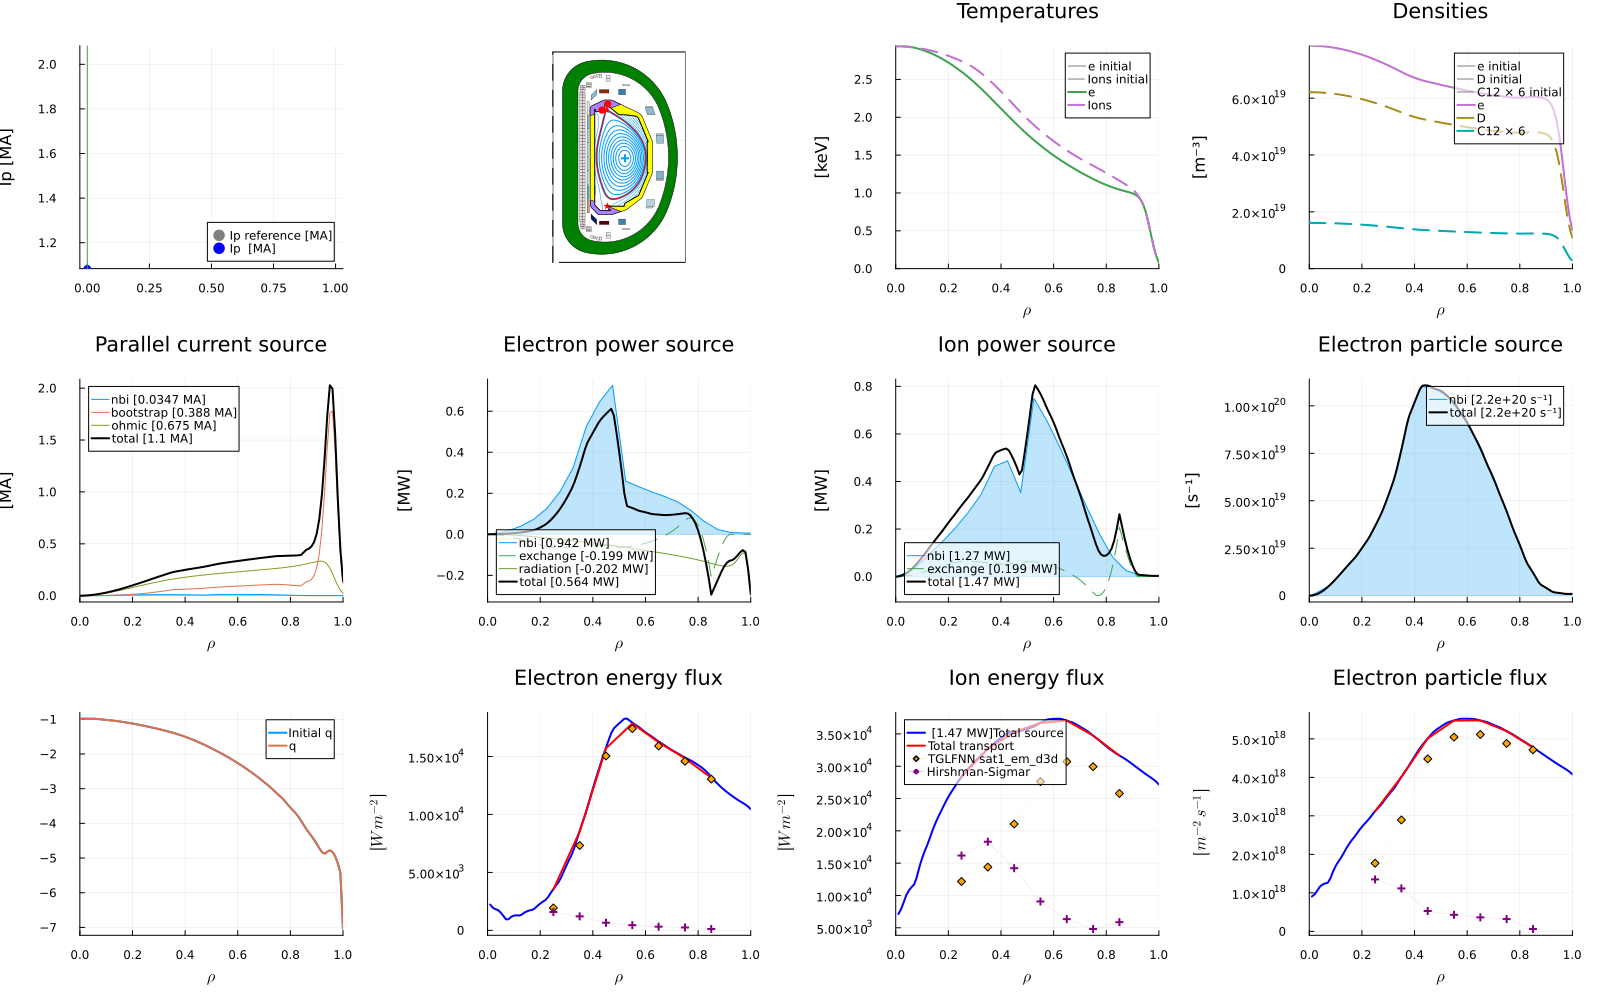

In [239]:
dd, ini, act = chk[:stationary];
FUSE.plot_plasma_overview(dd, dd.global_time; min_power=0.1E6, aggregate_radiation=true)

In [240]:
dd, ini, act = chk[:stationary];
act.ActorDynamicPlasma.Δt = 1.0
act.ActorDynamicPlasma.Nt = 15

act.ActorDynamicPlasma.evolve_current = false
act.ActorDynamicPlasma.evolve_equilibrium = false
act.ActorDynamicPlasma.evolve_pedestal = false
act.ActorDynamicPlasma.evolve_transport = false
act.ActorDynamicPlasma.evolve_hcd = true
act.ActorDynamicPlasma.evolve_pf_active = false
# act.ActorDynamicPlasma.ip_controller = false

FUSE.ActorDynamicPlasma(dd, act; verbose=true)
chk[:dynamic_no_transport] = dd, ini, act;

Progress: 100%|███████████████████████████| Time: 0:00:47 ( 0.35  s/it)
      start time:  0.0
        end time:  1.0
            time:  1.0
           stage:  PFactive (1/2)
         Ip [MA]:  1.081662899110869
       Ti0 [keV]:  2.935561368507912
       Te0 [keV]:  2.945916116799296
  ne0 [10²⁰ m⁻³]:  0.7927535472453306


In [241]:
dd, ini, act = chk[:dynamic_no_transport];
using Interact
@manipulate for time0 in dd.core_profiles.time[2:end]
    #plot(dd2.core_sources; time0)
    FUSE.plot_plasma_overview(dd, time0; min_power=0.1E6, aggregate_radiation=true)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["time0"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 15, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(8), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/meneghini/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/meneghini/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/meneghini/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/meneghini/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/meneghini/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000000035ce1c330, Task (runnable) @0x000000035ce1c330), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (4, 1014674209, -4755801206503243776)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0666667\",\"0.133333\",\"0.2\",\"0.266667\",\"0.333333\",\"0.4\",\"0.466667\",\"0.533333\",\"0.6\",\"0.666667\

In [242]:
actor=FUSE.ActorRABBIT(dd,act);

[ Info: RABBIT


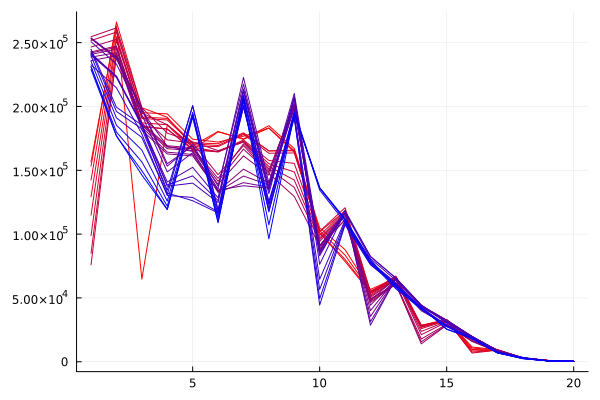

In [244]:
data = actor.outputs.powi_data
n=size(data)[2]
CList = reshape( range(colorant"red", stop=colorant"blue",length=n), 1, n );
plot(data;label="",seriescolor=CList)
#plot!(data[:,end];label="",seriescolor=CList)